## 課題4-1

### CIFAR-10を用いてdata augmentation(データ拡張)

kerasで用意されているデータセットについて(https://keras.io/ja/datasets/)

In [1]:
import os
import shutil
import numpy as np
#from scipy.misc import toimage
from PIL.Image import fromarray
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

#ImageDataGeneratorは以下を参照(https://keras.io/preprocessing/image/)

Using TensorFlow backend.


In [0]:
# data augmentation前後の画像（４x４枚）を保存する
def draw(X, filename):
    plt.figure()
    pos = 1
    for i in range(X.shape[0]):
        plt.subplot(4, 4, pos)
        img = fromarray(X[i], mode = 'RGB') #ndarrayをPIL imageに変換
        plt.imshow(img)
        plt.axis('off')
        pos += 1
    plt.savefig(filename) #カレントディレクトリに処理前後の画像を保存

In [0]:
img_rows, img_cols, img_channels = 32, 32, 3
batch_size = 16
nb_classes = 10

# CIFAR-10データをロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 画素値を0-1に変換
X_train = X_train.astype('float32')
X_train /= 255.0

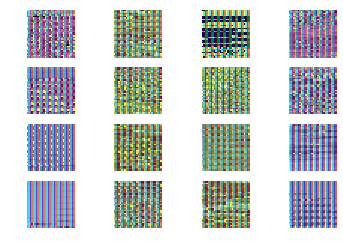

In [4]:
draw(X_train[0:batch_size], 'rotation_before.png')

(16, 32, 32, 3)
(16, 1)


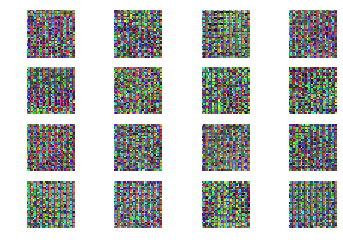

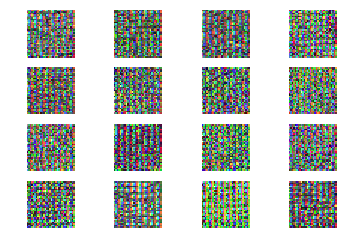

In [5]:
# データ拡張
datagen = ImageDataGenerator(rotation_range=90) # 画像を指定の角度でランダムに回転させる (0-180)
#datagen = ImageDataGenerator(width_shift_range=0.3)


#  水増し画像を訓練用画像の形式に合わせる
datagen.fit(X_train)

g = datagen.flow(X_train, y_train, batch_size = batch_size, shuffle=False)
X_batch, y_batch = g.__next__()
draw(X_batch, 'rotation_after.png')
X_batch, y_batch = g.__next__()
draw(X_batch, 'rotation_after.png')#イテレータから次の値を取得する（ここでは０から１５枚目の画像と教師データを取得）
print(X_batch.shape)
print(y_batch.shape)



In [0]:
#様々なdata augmentationの例
datagen = ImageDataGenerator(
        rotation_range=0,  # 画像を指定の角度でランダムに回転させる
        width_shift_range=0.1,  # 画像を水平方向にランダムに移動する (0-1,1は画像サイズを基準にしている)
        height_shift_range=0.1,  # 画像を垂直方向にランダムに移動する (0-1,1は画像サイズを基準にしている)
        horizontal_flip=True,  # 画像を水平方向にランダムに反転する
        vertical_flip=False,  # 画像を垂直方向にランダムに反転する
        featurewise_center=False,  # データセット上で入力平均を0に設定する
        samplewise_center=False,  # サンプル平均を0にする
        featurewise_std_normalization=False,  # サンプルを標準偏差で割る
        samplewise_std_normalization=False,  # 各入力を標準偏差で割る
        zca_whitening=False)  # ZCA白色化